In [1]:
# Some business Objectives:

#  Retain customers,
#  Analyze relevant customer data,
#  Develop focused customer retention programs.
#  Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.



#1. Import the necessary libraries.

#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

#3. First look at its main features (head, shape, info).

#4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

#5. Change effective to date column to datetime format.

#6. Define a function that differentiates between continuous and discrete variables. 
#   Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and 
#   do the same for discrete_df

#7. Plot a correlation matrix, comment what you see.

#8. Create a function to plot every discrete variable. Do the same with the continuous variables 
#   (Be Careful, you may need to change the plot type to one better suited for continuous data!)

#9. Comment what you can see in the plots.

#10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

#11. Did you find outliers? Comment what you will do with them.

#12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.


#1. Import the necessary libraries if you are starting a new notebook. Using the same data as the previous lab: 
#   we_fn_use_c_marketing_customer_value_analysis.csv

#2. Find all of the categorical data. Save it in a categorical_df variable.

#3. Check for NaN values.

#4. Check all unique values of columns.

#5. Check dtypes. Do they all make sense as categorical data?

#6. Does any column contain alpha and numeric data? Decide how to clean it.

#7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

#8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

#9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your 
#   thoughts and make those changes.

In [2]:
#1. Import the necessary libraries.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [5]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
#3. First look at its main features (head, shape, info).

In [7]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [8]:
#4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [9]:
def snake_case(df):
    cols = []
    for c in df.columns:
        cols.append(c.lower())
    df.columns = cols
    cols_ = df.columns.str.replace(' ', '_')
    df.columns = cols_
    return df

customer_df = snake_case(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [10]:
#5. Change effective to date column to datetime format.

In [11]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])


In [12]:
#12. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [13]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [14]:
customer_df.isnull().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [15]:
customer_df.nunique()

customer                         9134
state                               5
customer_lifetime_value          8041
response                            2
coverage                            3
education                           5
effective_to_date                  59
employmentstatus                    5
gender                              2
income                           5694
location_code                       3
marital_status                      3
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
policy_type                         3
policy                              9
renew_offer_type                    4
sales_channel                       4
total_claim_amount               5106
vehicle_class                       6
vehicle_size                        3
dtype: int64

In [16]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [17]:
# Define a function that differentiates between continuous and discrete variables. 
#   Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and 
#   do the same for discrete_df

In [18]:
def discr_cont(df):
    cat = customer_df.select_dtypes(include=object)
    continuous = []
    discrete = []
    
    for c in customer_df.select_dtypes(include=np.number):
        if len(df[c].unique()) < 10:
            discrete.append(c)
        else:
            continuous.append(c)
    return cat, continuous, discrete

cat, continuous, discrete = discr_cont(customer_df)

print(continuous)
print(discrete)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount']
['number_of_open_complaints', 'number_of_policies']


In [19]:
continuous_df = pd.DataFrame(data=customer_df,columns=continuous)
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [20]:
#7. Plot a correlation matrix, comment what you see.

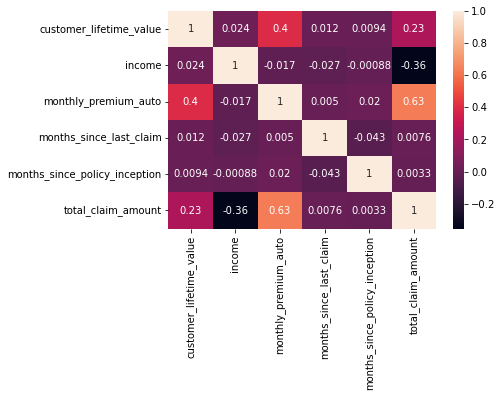

In [21]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [22]:
#total claim amount & monthly premium auto are highly correlated. monthly premium auto & customer lifetime value has the second highest correlation

In [23]:
discrete_df = pd.DataFrame(data=customer_df,columns=discrete)
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


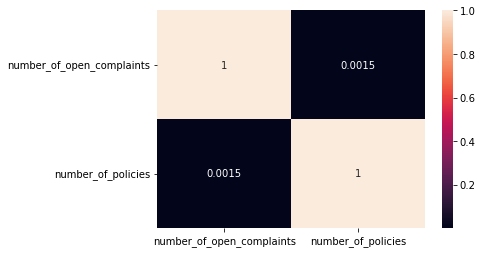

In [24]:
# kinda pointless lol

correlations_matrix = discrete_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [25]:
#8. Create a function to plot every discrete variable. Do the same with the continuous variables 
#   (Be Careful, you may need to change the plot type to one better suited for continuous data!)

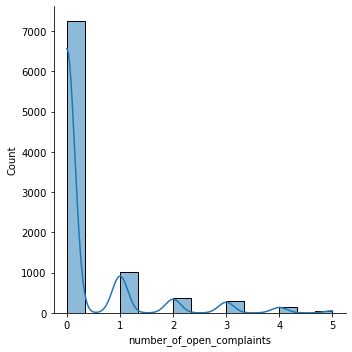

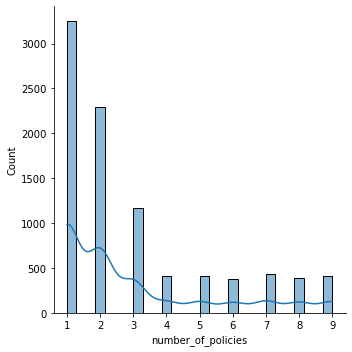

In [26]:
for i, column in enumerate(discrete_df.columns, 1):
    sns.displot(discrete_df[column], kde=True)

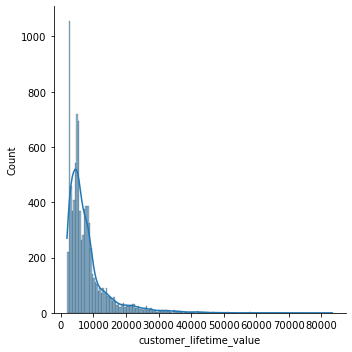

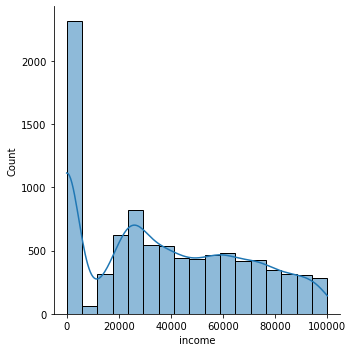

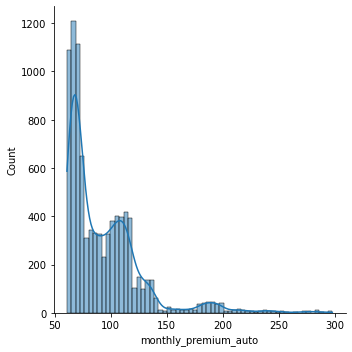

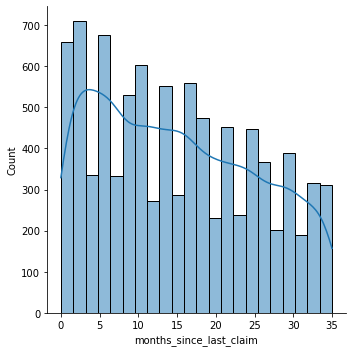

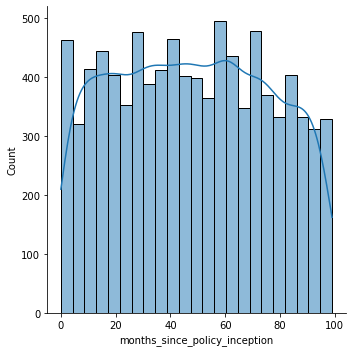

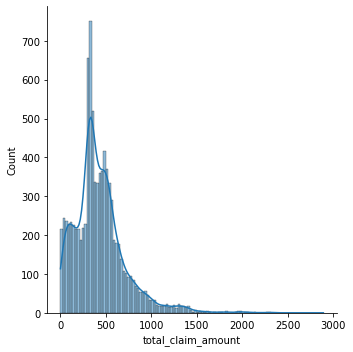

In [27]:
for i, column in enumerate(continuous_df.columns, 1):
    sns.displot(continuous_df[column], kde=True)

In [28]:
def log_transfom_clean(x):
    if x>0:
        return np.log(x)
    else:
        return np.NAN

In [29]:
#10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

#11. Did you find outliers? Comment what you will do with them.

# These three below had many outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x298d42e3f70>,
 'caps': [<matplotlib.lines.Line2D at 0x298d4318550>,
 'boxes': [<matplotlib.lines.Line2D at 0x298d42e3ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x298d4318af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x298d4318dc0>],
 'means': []}

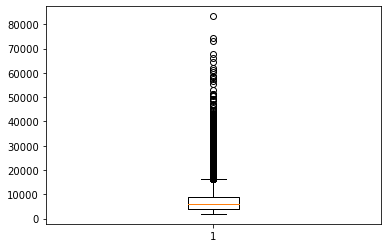

In [30]:

plt.boxplot(continuous_df['customer_lifetime_value'])

{'whiskers': [<matplotlib.lines.Line2D at 0x298d5d11220>,
 'caps': [<matplotlib.lines.Line2D at 0x298d5d117c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x298d5d11070>],
 'medians': [<matplotlib.lines.Line2D at 0x298d5d11d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x298d5d20070>],
 'means': []}

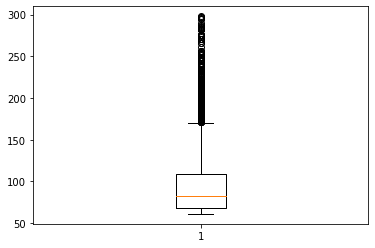

In [31]:
plt.boxplot(continuous_df['monthly_premium_auto'])

{'whiskers': [<matplotlib.lines.Line2D at 0x298d5d6f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x298d5d6fc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x298d5d6f3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x298d5d7c220>],
 'fliers': [<matplotlib.lines.Line2D at 0x298d5d7c4f0>],
 'means': []}

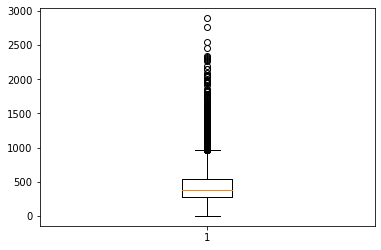

In [32]:
plt.boxplot(continuous_df['total_claim_amount'])

In [33]:
categorical_df = customer_df.select_dtypes(object)

In [34]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [35]:
#5. Check dtypes. Do they all make sense as categorical data?

In [36]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [37]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [38]:
categorical_df['education'].value_counts() # I won't change as college could mean they have attended some college and Bachelor could mean they finished

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [39]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [40]:
def clean(x):
    if x in ['Medical Leave']:
        return 'Disabled'
    else:
        return x
    
categorical_df['employmentstatus'] = list(map(clean, categorical_df['employmentstatus']))
categorical_df['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Disabled       837
Retired        282
Name: employmentstatus, dtype: int64

In [41]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [42]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [43]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [44]:
categorical_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [45]:
categorical_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [46]:
categorical_df['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [47]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [48]:
categorical_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [49]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [50]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [51]:
# most have four or less so it's no need to combine any. This excludes employment status & policy. Depending on what we are looking for determines if they should be combined.

In [52]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [53]:
# Plot all the categorical variables with the proper plot. What can you see?

In [58]:
categoricals = categoricals.drop(['customer'], axis=1)

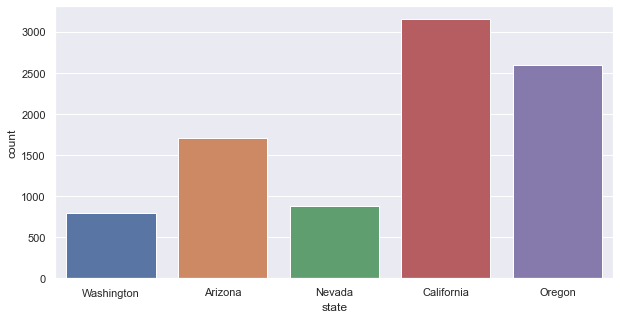

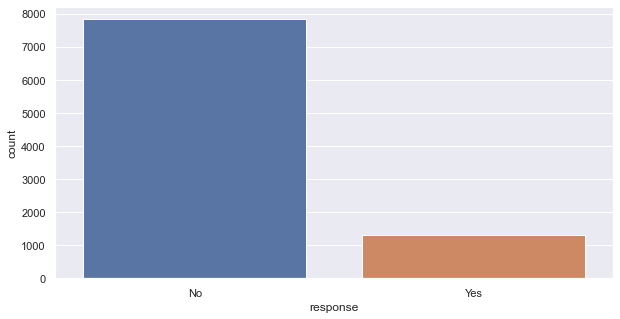

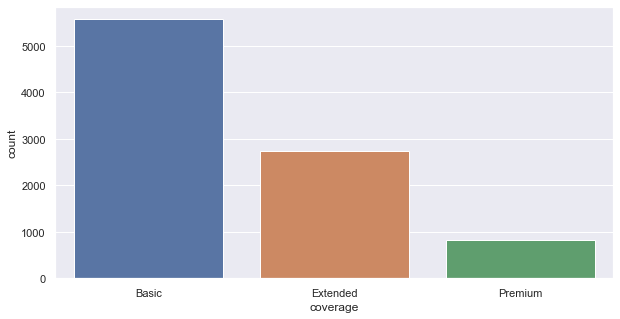

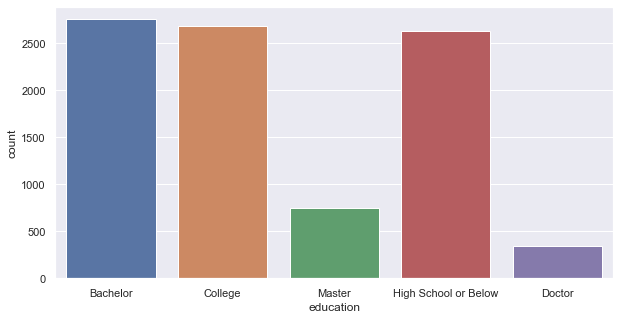

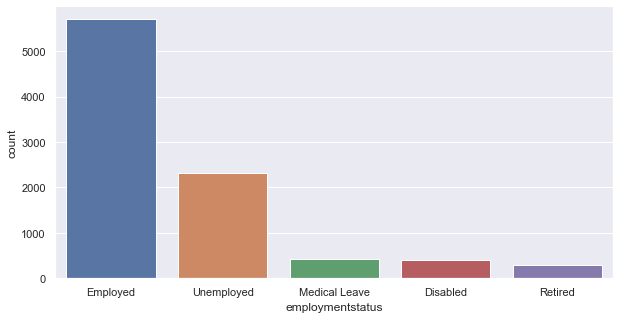

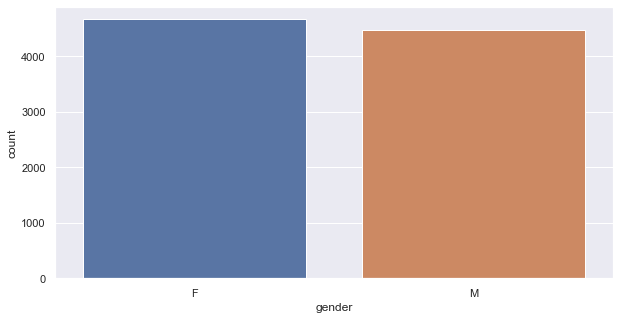

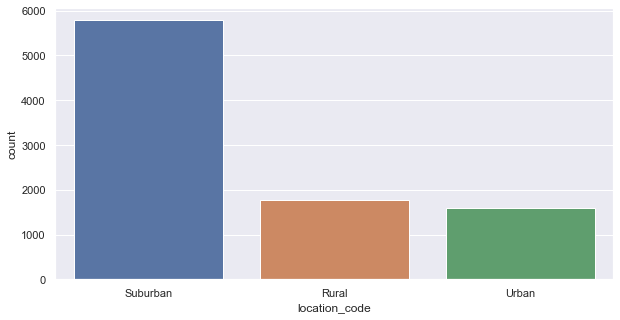

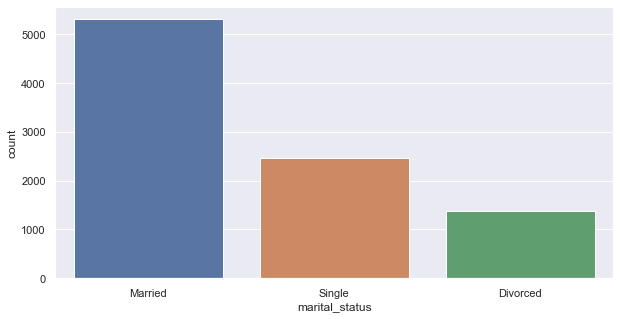

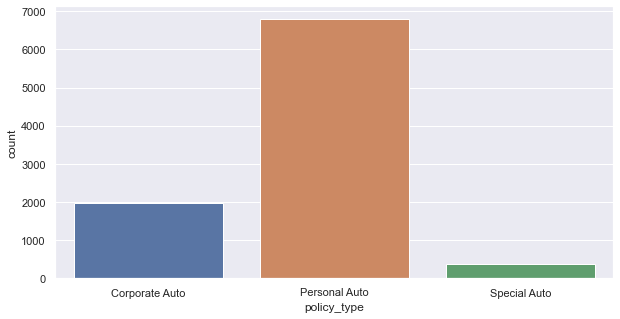

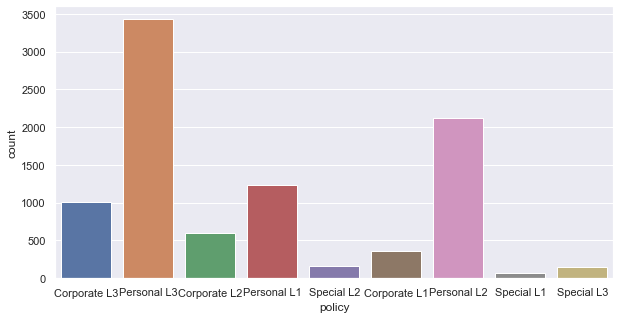

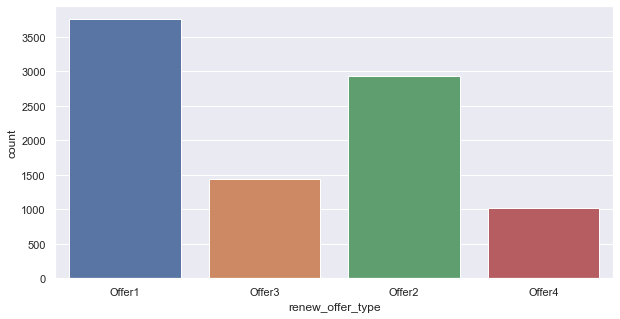

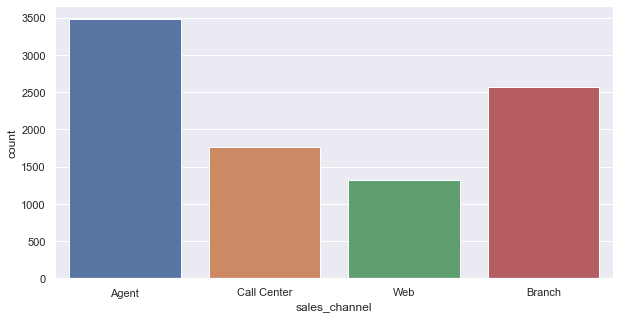

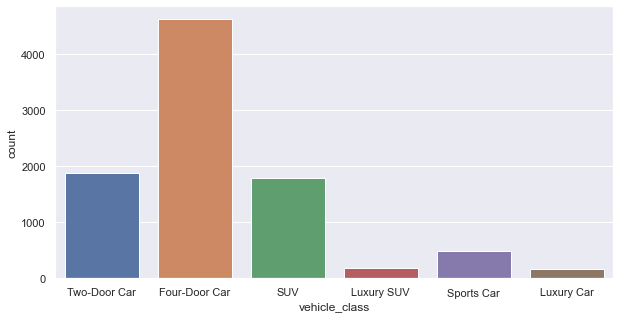

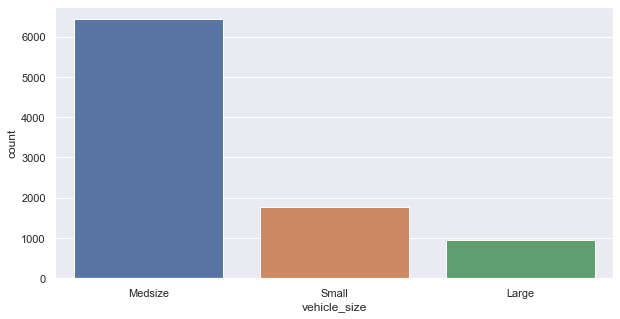

In [59]:
sns.set(rc = {'figure.figsize':(10,5)})

def countplot_disc(df):
    for c in df:
        sns.countplot(x=c, data=df)
        plt.show()
    return None

countplot_disc(categoricals) #Accidently ran this with customer column included, trying to be effecient caused my computer to sound like an airplane

In [60]:
# There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [61]:
categoricals ['education'].value_counts(dropna=False)

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [62]:
categoricals ['vehicle_class'].value_counts(dropna=False) #Luxury is so small it's not worth being separate

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [63]:
def clean2(x):
    if x in ['Luxury SUV' , 'Luxury Car']:
        return 'Luxury Vehicle'
    else:
        return x
    
categoricals['vehicle_class'] = list(map(clean2, categoricals['vehicle_class']))
categoricals['vehicle_class'].value_counts()

Four-Door Car     4621
Two-Door Car      1886
SUV               1796
Sports Car         484
Luxury Vehicle     347
Name: vehicle_class, dtype: int64

In [64]:
categoricals ['employmentstatus'].value_counts(dropna=False)

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [65]:
categoricals['employmentstatus'] = list(map(clean, categoricals['employmentstatus']))
categoricals['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Disabled       837
Retired        282
Name: employmentstatus, dtype: int64

In [66]:
categoricals ['policy'].value_counts(dropna=False) 

#I do want to combine L1's, L2's, & L3's but this information could be very important depending on what you are looking for. 
#If you were trying to undertstand the Special L3, you wouldn't be able to do that if they are combined. 

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

# Comparing regression models

In [67]:
#2. Find all of the categorical data. Save it in a categorical_df variable.


In [68]:
categorical_df

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [69]:
categorical_df.drop('customer',inplace=True, axis=1)

In [70]:
discrete_df

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [71]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


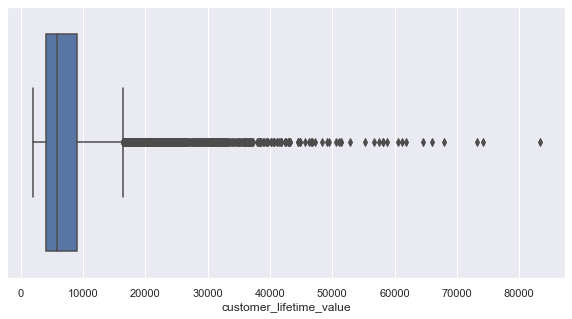

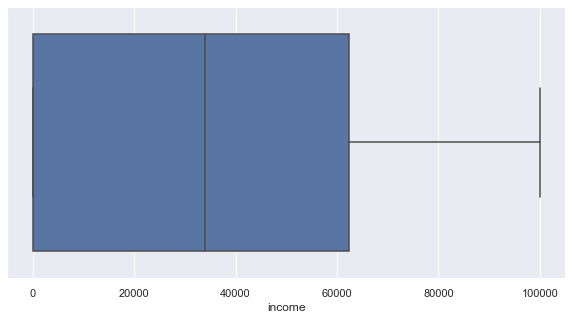

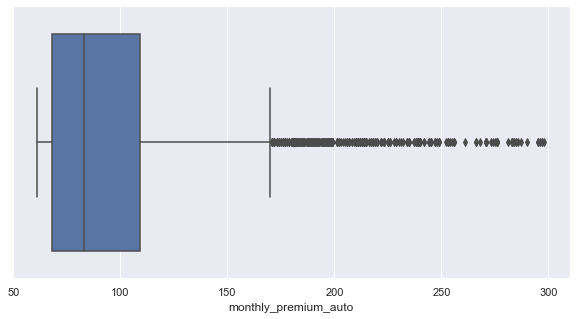

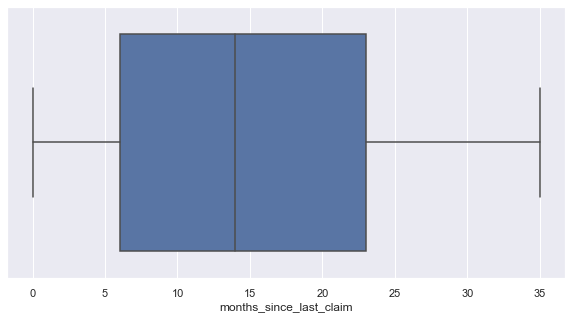

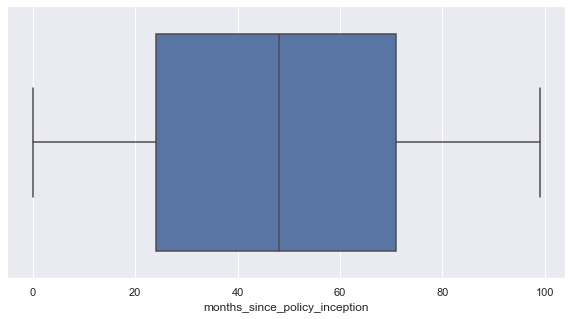

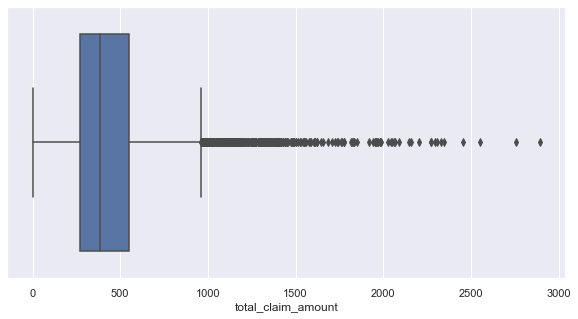

In [72]:
# Checking for outliers

def box_cont(df):
    for c in df:
        sns.boxplot(x=c, data=df)
        plt.show()
    return None

box_cont(continuous_df)

In [73]:
# Someone suggested i do a log transform instead of deleting outlier rows. total_claim_amount has many outliers so a log transform wouldn't help much

def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

for column in continuous_df:
    if column != 'total_claim_amount':
        continuous_df[column] = continuous_df[column].apply(log_transform)

In [74]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(continuous_df)
normalized = transformer.transform(continuous_df)
normalized = pd.DataFrame(normalized,columns=continuous_df.columns)
normalized.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.099340,0.749969,0.077690,0.974795,0.350249,0.132974
1,0.344314,NaN,0.272611,0.721434,0.813400,0.391051
2,0.506471,0.687682,0.360138,0.812964,0.791619,0.195764
3,0.368424,NaN,0.348354,0.812964,0.908439,0.183117
4,0.104098,0.641309,0.113216,0.698921,0.823524,0.047710


In [75]:
one_hot = categorical_df[['state','marital_status','policy','renew_offer_type','sales_channel','vehicle_class']]
ordinal = categorical_df[['coverage','employmentstatus','location_code','vehicle_size']]

In [93]:
one_hot

,state,marital_status,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,Married,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,Single,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,Married,Personal L3,Offer1,Agent,Two-Door Car
3,California,Married,Corporate L2,Offer1,Call Center,SUV
4,Washington,Single,Personal L1,Offer1,Agent,Four-Door Car
...,...,...,...,...,...,...
9129,California,Married,Personal L1,Offer2,Web,Four-Door Car
9130,California,Divorced,Corporate L3,Offer1,Branch,Four-Door Car
9131,California,Single,Corporate L2,Offer1,Branch,Four-Door Car
9132,California,Married,Personal L2,Offer3,Branch,Four-Door Car


In [94]:
ordinal

,coverage,employmentstatus,location_code,vehicle_size
0,Basic,Employed,Suburban,Medsize
1,Extended,Unemployed,Suburban,Medsize
2,Premium,Employed,Suburban,Medsize
3,Basic,Unemployed,Suburban,Medsize
4,Basic,Employed,Rural,Medsize
...,...,...,...,...
9129,Basic,Employed,Urban,Medsize
9130,Extended,Employed,Suburban,Medsize
9131,Extended,Unemployed,Suburban,Medsize
9132,Extended,Employed,Suburban,Large


In [95]:
ordinal['coverage'] = ordinal['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
ordinal['employmentstatus'] = ordinal['employmentstatus'].map({'Other' : 0, 'Unemployed' : 1, 'Employed' : 2})
ordinal['location_code'] = ordinal['location_code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
ordinal['vehicle_size'] = ordinal['vehicle_size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})
ordinal.head()

C:\Users\13306\AppData\Local\Temp\ipykernel_12328\2244303973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal['coverage'] = ordinal['coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
C:\Users\13306\AppData\Local\Temp\ipykernel_12328\2244303973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinal['employmentstatus'] = ordinal['employmentstatus'].map({'Other' : 0, 'Unemployed' : 1, 'Employed' : 2})
C:\Users\13306\AppData\Local\Temp\ipykernel_12328\2244303973.py:3: SettingWithCopyW

,coverage,employmentstatus,location_code,vehicle_size
0,0,2.0,1,1
1,1,1.0,1,1
2,2,2.0,1,1
3,0,1.0,1,1
4,0,2.0,0,1


In [97]:
customer_df['day'] = customer_df['effective_to_date'].dt.dayofweek
customer_df['month'] = customer_df['effective_to_date'].dt.month

In [76]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(one_hot)
encoded_onehot = encoder.transform(one_hot).toarray()

encoded_columns = list()
dropped_columns = list()

for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            dropped_columns.append(column)
            encoded_columns.append(column)
            condition = False
        else:
            encoded_columns.append(column)

onehot_encoded = pd.DataFrame(data = encoded_onehot, columns=encoded_columns)
onehot_encoded = onehot_encoded.drop(columns = dropped_columns)

onehot_encoded.head()

,California,Nevada,Oregon,Washington,Married,Single,Corporate L2,Corporate L3,Personal L1,Personal L2,...,Offer3,Offer4,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your 
#   thoughts and make those changes.

In [77]:
ordinal['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [78]:
ordinal['employmentstatus'].value_counts()

Employed      5698
Unemployed    2317
Disabled       837
Retired        282
Name: employmentstatus, dtype: int64

In [79]:
ordinal['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [80]:
ordinal['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [81]:
#7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

#8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?


In [86]:
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['week'] = customer_df['effective_to_date'].dt.week
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['year'] = customer_df['effective_to_date'].dt.year

C:\Users\13306\AppData\Local\Temp\ipykernel_12328\2279881399.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  customer_df['week'] = customer_df['effective_to_date'].dt.week


In [84]:
print(categoricals['policy_type'].value_counts())
print(categoricals['policy'].value_counts())

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64


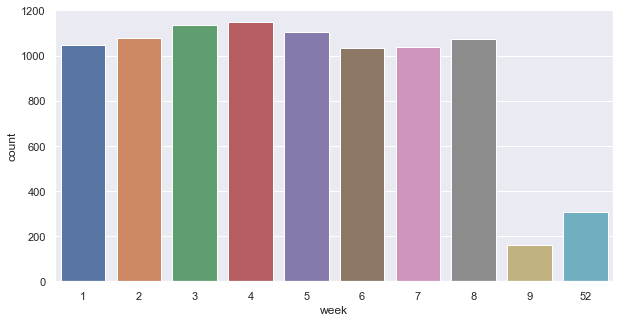

In [87]:
sns.countplot(x='week', data=customer_df)
plt.show()

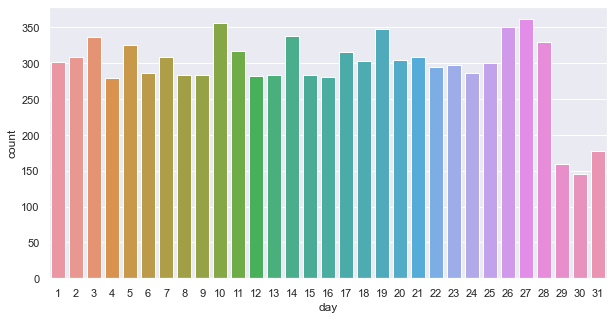

In [88]:
sns.countplot(x='day', data=customer_df)
plt.show()

In [92]:
continuous_df


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,7.924260,10.937988,4.234107,3.465736,1.609438,384.811147
1,8.850738,NaN,4.543295,2.564949,3.737670,1131.464935
2,9.464008,10.794809,4.682131,2.890372,3.637586,566.472247
3,8.941920,NaN,4.663439,2.890372,4.174387,529.881344
4,7.942253,10.688211,4.290459,2.484907,3.784190,138.130879
...,...,...,...,...,...,...
9129,10.060747,11.183602,4.290459,2.890372,4.488636,198.234764
9130,8.038031,9.980634,4.369448,2.639057,3.332205,379.200000
9131,9.007476,NaN,4.442651,2.197225,3.610918,790.784983
9132,8.925912,9.996112,4.564348,3.526361,1.098612,691.200000


In [ ]:
y = customer_df['total_claim_amount']
X = customer.drop(['total_claim_amount'],axis=1)
continuous = customer_copy[['customer_lifetime_value','income','monthly_premium_auto','months_since_last_claim','months_since_policy_inception']]
continuous_copy.head()

In [104]:
ordinal

,coverage,employmentstatus,location_code,vehicle_size
0,0,2.0,1,1
1,1,1.0,1,1
2,2,2.0,1,1
3,0,1.0,1,1
4,0,2.0,0,1
...,...,...,...,...
9129,0,2.0,2,1
9130,1,2.0,1,1
9131,1,1.0,1,1
9132,1,2.0,1,2


In [105]:
onehot_encoded

,California,Nevada,Oregon,Washington,Married,Single,Corporate L2,Corporate L3,Personal L1,Personal L2,...,Offer3,Offer4,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9131,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9132,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
normalized

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,0.099340,0.749969,0.077690,0.974795,0.350249,0.132974
1,0.344314,NaN,0.272611,0.721434,0.813400,0.391051
2,0.506471,0.687682,0.360138,0.812964,0.791619,0.195764
3,0.368424,NaN,0.348354,0.812964,0.908439,0.183117
4,0.104098,0.641309,0.113216,0.698921,0.823524,0.047710
...,...,...,...,...,...,...
9129,0.664257,0.856818,0.113216,0.812964,0.976827,0.068485
9130,0.129423,0.333493,0.163013,0.742278,0.725162,0.131034
9131,0.385758,NaN,0.209162,0.618005,0.785816,0.273297
9132,0.364191,0.340226,0.285884,0.991847,0.239082,0.238876


In [109]:
customer_df[['number_of_policies', 'day', 'month']]

,number_of_policies,day,month
0,1,3,2
1,8,0,1
2,2,5,2
3,7,3,1
4,1,3,2
...,...,...,...
9129,2,3,2
9130,1,5,2
9131,2,6,2
9132,3,3,2


In [110]:
normalized.isnull().sum()/len(normalized)

customer_lifetime_value          0.000000
income                           0.253668
monthly_premium_auto             0.000000
months_since_last_claim          0.034377
months_since_policy_inception    0.009087
total_claim_amount               0.000000
dtype: float64

In [89]:
X = pd.concat([ordinal,onehot_encoded,normalized,customer_df[['number_of_policies','day','month']]],axis=1)
X.head()

NameError: name 'customer_copy' is not defined

In [ ]:
customer_df.isnull().sum()/len(customer_df)